Performing online retail data cleaning, exploratory data analysis, RFM analysis 

1) Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
df = pd.read_excel("Online Retail.xlsx")
df.iloc[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Made data types consistent through conversions

In [7]:
df["StockCode"] = df["StockCode"].astype(str)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Description"] = df["Description"].astype(str)
df.loc[df["Description"] == "nan", "Description"] = np.nan
df["CustomerID"] = df["CustomerID"].astype(str)
df.iloc[:5]
df.loc[df["CustomerID"] == "nan", "CustomerID"] = np.nan

In [8]:
df_copy = df.copy()
df_copy.iloc[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df = df_copy.copy()

Fills a record with a the mode description for each unique stock code instead of dropping missing data

In [11]:
def most_common(codes_lst):
    for code in codes_lst:
        m = df[df["StockCode"] == code]["Description"].mode()
        if not m.empty:
            df.loc[df["StockCode"] == code, "Description"] = m[0]
            
stock_codes = df["StockCode"].unique()
most_common(stock_codes)
df.iloc[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Dropped rows where CustomerID is missing data, InvoiceNo where it references cancelled orders, UnitPrice that is less than or equal to 0, and duplicate rows.

In [13]:
df = df[df["CustomerID"].notnull()]
df_copy = df.copy()
df = df[df["InvoiceNo"].str[0] != "C"]
df = df[df["UnitPrice"] >0]
df=df.drop_duplicates()


2) EDA

Descriptive Stats

In [16]:
unique_customers = len(df["CustomerID"].drop_duplicates())
print("Number of Unique Customers:", unique_customers)
unique_products = len(df["StockCode"].drop_duplicates())
print("Number of Unique Products:", unique_products)
first_date = min(df["InvoiceDate"])
final_date = max(df["InvoiceDate"])
print("Date Range:", first_date, "to", final_date)


Number of Unique Customers: 4338
Number of Unique Products: 3665
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


Revenue & Sales Trends

In [18]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
total_revenue = df["Revenue"].sum()
print("Total Revenue:", f"${format(total_revenue,',.2f')}")

Total Revenue: $8,886,657.04


Top 10 Products by Quantity and Revenue

Text(0.5, 1.0, 'Top 10 Products Sold by Quantity')

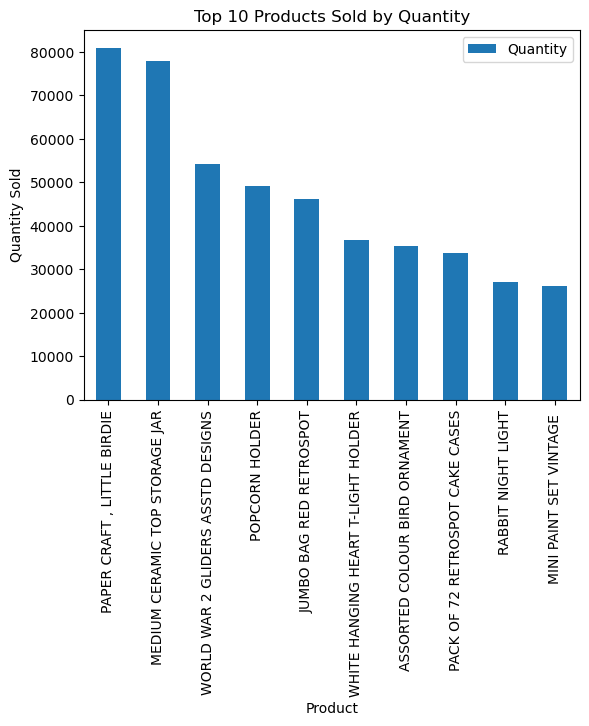

In [20]:
df.groupby(["StockCode", "Description"])["Quantity"].sum().sort_values(ascending= False).reset_index()[:10].plot(x = "Description", y = "Quantity", kind = "bar")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Top 10 Products Sold by Quantity")

Text(0.5, 1.0, 'Top 10 Products by Revenue')

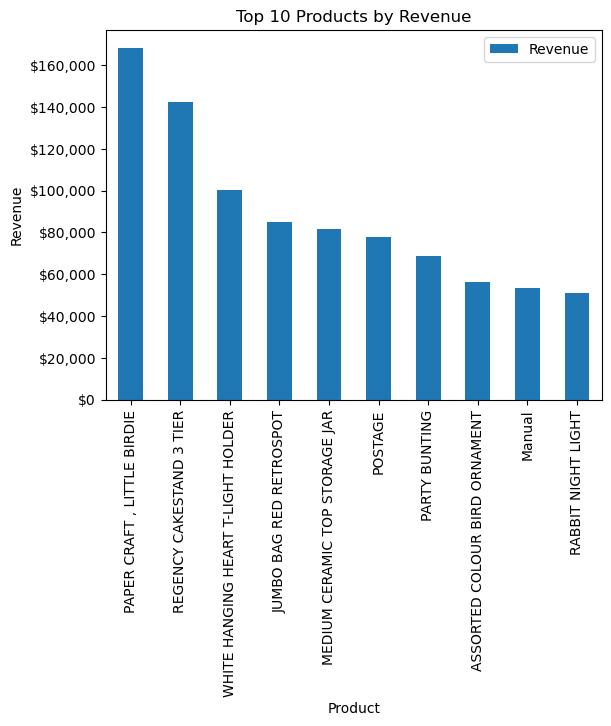

In [21]:
ax = df.groupby(["StockCode", "Description"])["Revenue"].sum().sort_values(ascending= False)[:10].reset_index()[:10].plot(x = "Description", y = "Revenue", kind = "bar")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Top 10 Products by Revenue")

Countries that bring in the most revenue other than the UK

Text(0.5, 1.0, 'Top Countries That Bring in the Most Revenue Excluding the UK')

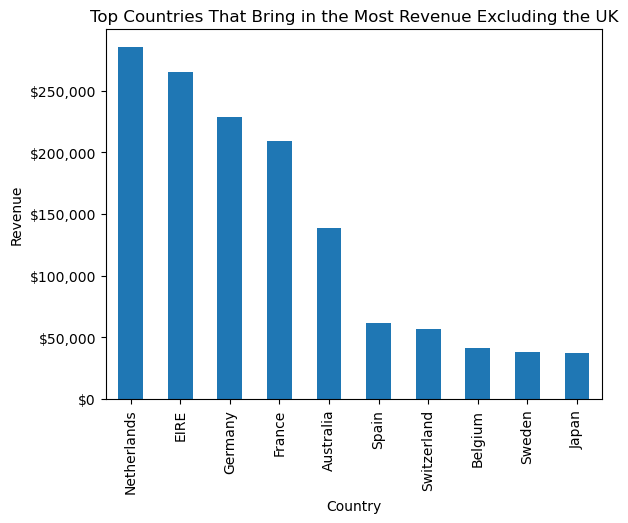

In [23]:
ax2 = df[df["Country"] != "United Kingdom"].groupby("Country")["Revenue"].sum().sort_values(ascending = False)[:10].plot(kind = "bar")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Top Countries That Bring in the Most Revenue Excluding the UK")

Monthly Revenue and Total Revenue for Each Day of the Week

Text(0.5, 1.0, 'Monthly Revenue over Time ')

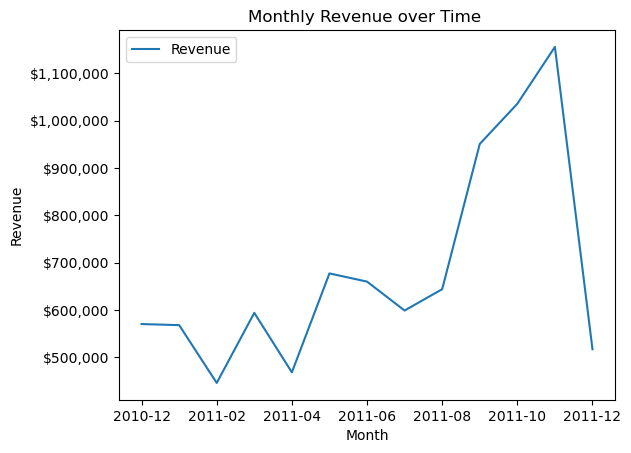

In [25]:
df["Month"] = df['InvoiceDate'].dt.strftime('%Y-%m')
ax3 = df.groupby("Month")["Revenue"].sum().reset_index().sort_values(by = "Month", ascending = True).plot(x="Month", y="Revenue", linestyle = '-')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue over Time ")

C:\Users\rvmin\AppData\Local\Temp\ipykernel_1980\243373482.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax4 = df.groupby("Day")["Revenue"].sum().reset_index().sort_values(by = "Day", ascending = True).plot(x="Day", y="Revenue", linestyle = '-')


Text(0.5, 1.0, 'Total Revenue by Day of the Week')

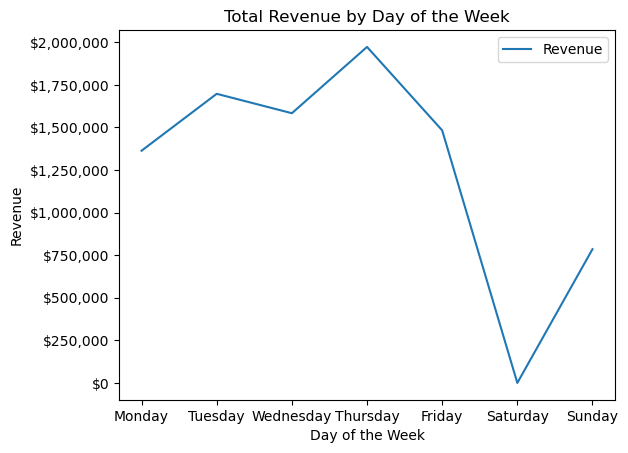

In [26]:
df["Day"] = df["InvoiceDate"].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=weekday_order, ordered=True)
ax4 = df.groupby("Day")["Revenue"].sum().reset_index().sort_values(by = "Day", ascending = True).plot(x="Day", y="Revenue", linestyle = '-')
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("Day of the Week")
plt.ylabel("Revenue")
plt.title("Total Revenue by Day of the Week")

3) Customer Segmentation with RFM Analysis (Behavioral Analysis)

Objective: Segment customers by how recently, frequently, and how much they purchase.

Creating Recency, Frequency, and Monetary Values

In [28]:
rfm_df = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
rfm_df.rename(columns = {"InvoiceDate": "LastPurchaseDate"}, inplace = True)
rfm_df["Recency"] = final_date - rfm_df["LastPurchaseDate"]
rfm_df["Recency"] = rfm_df["Recency"].dt.days
rfm_df.iloc[:5]

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [29]:
freq = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
freq.rename(columns={"InvoiceNo":"Frequency"}, inplace = True)
rfm_df = rfm_df.merge(freq, 
                      left_on = "CustomerID",
                      right_on = "CustomerID")
rfm_df              

,CustomerID,LastPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18 10:01:00,325,1
1,12347.0,2011-12-07 15:52:00,1,7
2,12348.0,2011-09-25 13:13:00,74,4
3,12349.0,2011-11-21 09:51:00,18,1
4,12350.0,2011-02-02 16:01:00,309,1
...,...,...,...,...
4333,18280.0,2011-03-07 09:52:00,277,1
4334,18281.0,2011-06-12 10:53:00,180,1
4335,18282.0,2011-12-02 11:43:00,7,2
4336,18283.0,2011-12-06 12:02:00,3,16


In [30]:
monetary = df.groupby("CustomerID")["Revenue"].sum().reset_index()
monetary.rename(columns={"Revenue":"Monetary"}, inplace= True)
rfm_df = rfm_df.merge(monetary,
                     left_on = "CustomerID",
                     right_on="CustomerID")
rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,77183.60
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4333,18280.0,2011-03-07 09:52:00,277,1,180.60
4334,18281.0,2011-06-12 10:53:00,180,1,80.82
4335,18282.0,2011-12-02 11:43:00,7,2,178.05
4336,18283.0,2011-12-06 12:02:00,3,16,2045.53


In [31]:
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm_df["F_Score"] = pd.cut(rfm_df["Frequency"], 5, labels=[1, 2, 3, 4, 5])
rfm_df["M_Score"] = pd.cut(rfm_df["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm_df["RFM_Segment"] = rfm_df["R_Score"].astype(str) + rfm_df["F_Score"].astype(str) + rfm_df["M_Score"].astype(str)


In [32]:
rfm_df.groupby("RFM_Segment")["CustomerID"].count().sort_values(ascending = False)

RFM_Segment
411    902
111    864
311    857
211    843
511    843
521      7
512      4
531      3
532      2
525      2
522      2
524      1
551      1
514      1
523      1
112      1
421      1
413      1
322      1
553      1
Name: CustomerID, dtype: int64

Segment 511 represents customers with a high recency score but low frequency and monetary value. These users have purchased recently, but only once and with a low spend — suggesting they’re likely new customers. This makes them strong candidates for targeted retention or upsell campaigns, as they’ve already shown recent engagement.

Overall, the distribution shows no dominant clusters among high-frequency or high-value spenders, indicating that most customers are low-frequency, low-value purchasers. This suggests an opportunity to build loyalty programs or incentivize repeat purchases among recent but low-engagement segments.

A large portion of customers fall into segments ending in 11, indicating low frequency and low monetary value, regardless of their recency score. This suggests that many customers only purchase once and then disengage, even if they start as recent buyers. Without an effective follow-up or retention strategy, high-recency segments like 511 risk becoming dormant groups like 111 or 211.

In [34]:
rfm_df.groupby("RFM_Segment")["Monetary"].agg(["count", "mean", "sum"]).sort_values(by = "sum", ascending = False)

,count,mean,sum
RFM_Segment,,,
511,843,3124.918624,2634306.400
411,902,1837.741731,1657643.041
311,857,1188.542812,1018581.190
211,843,899.910762,758624.772
525,2,269931.660000,539863.320
111,864,556.210985,480566.291
512,4,69783.362500,279133.450
521,7,33819.521429,236736.650
524,1,194390.790000,194390.790


Text(0.5, 1.0, 'Top 10 Segments by Revenue')

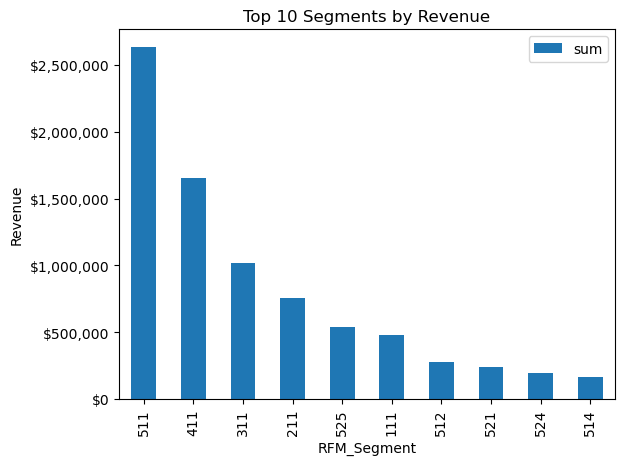

In [35]:
ax5 = rfm_df.groupby("RFM_Segment")["Monetary"].agg(["count", "mean", "sum"]).sort_values(by = "sum", ascending = False).reset_index()[:10].plot(x = "RFM_Segment", y = "sum", kind = "bar")
ax5.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("RFM_Segment")
plt.ylabel("Revenue")
plt.title("Top 10 Segments by Revenue")

Text(0.5, 1.0, 'Segments with the Most Number of Customers')

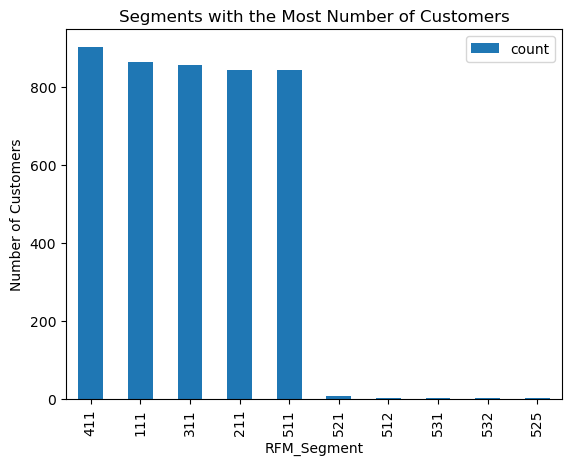

In [36]:
ax6 = rfm_df.groupby("RFM_Segment")["Monetary"].agg(["count", "mean", "sum"]).sort_values(by = "count", ascending = False).reset_index()[:10].plot(x = "RFM_Segment", y = "count", kind = "bar")
ax6.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel("RFM_Segment")
plt.ylabel("Number of Customers")
plt.title("Segments with the Most Number of Customers")

Text(0.5, 1.0, 'Segments with the Highest Average Revenue')

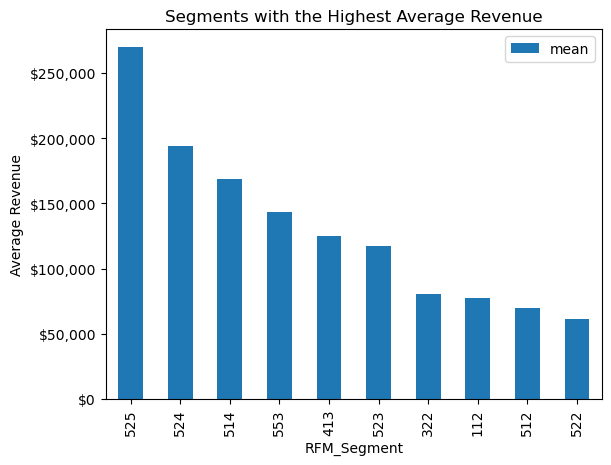

In [37]:
ax7 = rfm_df.groupby("RFM_Segment")["Monetary"].agg(["count", "mean", "sum"]).sort_values(by = "mean", ascending = False).reset_index()[:10].plot(x = "RFM_Segment", y = "mean", kind = "bar")
ax7.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel("RFM_Segment")
plt.ylabel("Average Revenue")
plt.title("Segments with the Highest Average Revenue")

The most valuable customers by average revenue are extremely rare — appearing fewer than 5 times in the dataset. While they're worth identifying and retaining, the real opportunity lies in improving the behavior of large segments like 511 and 411, who are recent purchasers but still low in value. Even small changes in their behavior (repeat purchase, upsell) could lead to significant revenue impact at scale.

In [39]:
mba_df = df.groupby(["InvoiceNo", "Description"]).size().unstack().fillna(0)
mba_df[mba_df > 0] = 1

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

reduced = mba_df.loc[:, mba_df.sum() > 250]
frequent_itemsets = apriori(reduced, 
                            min_support=0.01, 
                            use_colnames=True)

frequent_itemsets

C:\Users\rvmin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.019858,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.014893,(12 PENCIL SMALL TUBE WOODLAND)
2,0.016566,(12 PENCILS SMALL TUBE RED RETROSPOT)
3,0.015703,(12 PENCILS SMALL TUBE SKULL)
4,0.014084,(3 HEARTS HANGING DECORATION RUSTIC)
...,...,...
820,0.011763,"(LUNCH BAG SUKI DESIGN , LUNCH BAG SPACEBOY DE..."
821,0.014300,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP..."
822,0.010037,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ..."
823,0.012897,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP..."


In [41]:
rules = association_rules(frequent_itemsets, 
                          metric="lift", 
                          min_threshold=1.0)

pd.set_option('display.max_colwidth', None)
rules['pair'] = rules.apply(lambda row: row['antecedents'].union(row['consequents']), axis=1)
cleaned_rules = rules.drop_duplicates(subset='pair').sort_values(by='lift', ascending=False)
cleaned_rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
592,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.011116,0.757353,52.370391
1082,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM )",(POPPY'S PLAYHOUSE BEDROOM ),0.010037,0.865116,50.735237
598,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.012357,0.848148,47.920370
566,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE BEDROOM ),0.011062,0.813492,47.707705
632,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.012735,0.726154,47.217835


📌 Market Basket Insights & Business Recommendations

1. Regency Milk Jug & Sugar Bowl
Customers who buy the “Regency Milk Jug Pink” also purchase the “Regency Sugar Bowl Green” 75.73% of the time. With a lift of 52.37, this pairing is 52× more likely to occur together than by random chance.

📦 Recommendation: Bundle both products as a tea set and offer a 10% discount, if margins allow.

🛒 Alternatively, display the paired product during cart/checkout for cross-sell.

🎯 Target: Customers in RFM segment 511 (recent one-time buyers) are ideal for this strategy to boost retention and order value.

2. Poppy’s Playhouse Sets
Customers who buy “Poppy’s Playhouse Livingroom” and “Kitchen” go on to buy the “Bedroom” 86.51% of the time — a lift of 50.73.

🧸 Recommendation: Offer a bundled 3-room playhouse set at a slight discount to maximize order value.

🔁 Alternatively, retarget buyers of two rooms with a follow-up offer for the third.

3. Red Spotty Party Cups & Plates
Customers who buy “Red Spotty Paper Cups” also buy the matching plates 72.61% of the time, with a lift of 47.21.

🎉 Recommendation: Create a party bundle featuring both items.

🛍️ Position as a one-click solution for themed events.

General Insight
While these product combinations have low overall support (~1%), they show extremely strong associations. This means that although not everyone buys them, those who do exhibit consistent co-purchase behavior — making them ideal for bundling, cross-selling, and upsell strategies to increase the frequency and value of these purchases.

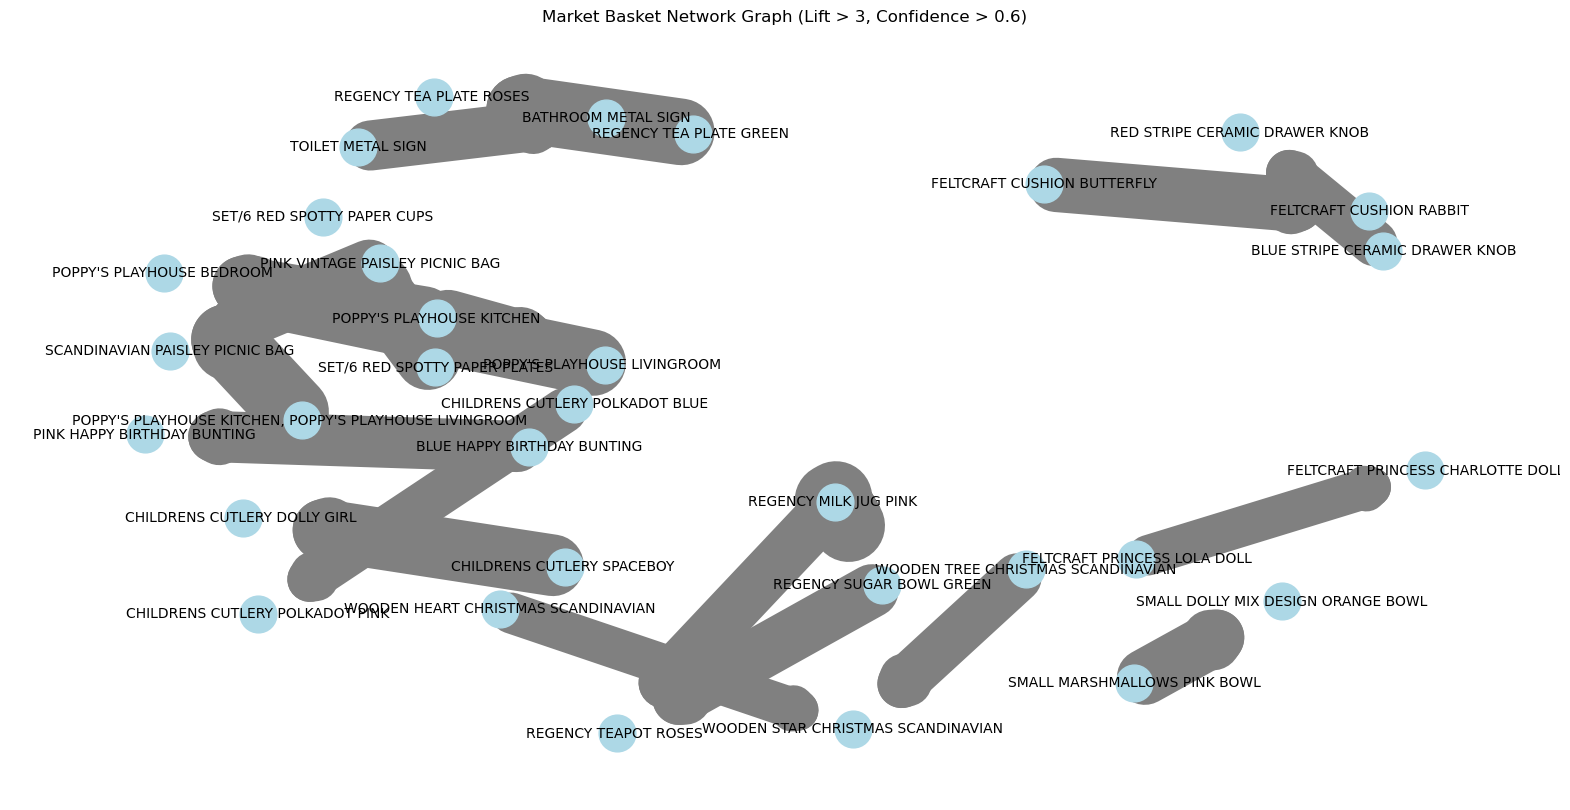

In [98]:
import networkx as nx

filtered_rules = cleaned_rules[(cleaned_rules["confidence"] > 0.6) & (cleaned_rules["lift"] > 3)].reset_index(drop=True).head(20)
G = nx.DiGraph()

for _, row in filtered_rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G, k=2, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw edges with weight as width
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_weights)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Market Basket Network Graph (Lift > 3, Confidence > 0.6)")
plt.axis('off')
plt.show()

The market basket network graph reveals strong co-purchase clusters that can drive strategic bundling. Notably, the Regency Tableware Set and Poppy’s Playhouse series stand out as ideal candidates for bundled promotions. Similarly, Red Spotty Party Supplies and Feltcraft Cushions show product affinity, suggesting themed packaging and upsell opportunities. These clusters offer actionable paths to improve AOV (average order value) and customer retention.

In [45]:
#df.to_csv("online_retail_cleaned.csv", index=False)

In [46]:
#rfm_df.to_csv("rfm_output.csv", index=False)

In [47]:
#cleaned_rules.to_csv("mba_rules.csv", index=False)